# **CUSTOMER CHURN PREDICTOR**

## **BUSINESS UNDERSTANDING**

- **Problem statement** – customers leaving/unsubscribing from the telco services after some time.
- **Project aim** – the aim of the project is to find the likelihood of a customer leaving the organization, key indicators of churn as well as some retention strategies that can be implemented to avert this problem.

**Null Hypothesis**- The monthly charges on a customer have no significant effect on whether they will churn.

**Alternative Hypothesis**- The monthly charges on a customer have a significant effect on whether they will churn.

***Key analytical questions***
1) Which gender is most likely to churn?
2) Which gender is likely to pay more for the services monthly?
3) Does the amount a customer is charged monthly have an effect on the contract they procure?
4) What internet service is most likely to have the most loyal customers?
5) Which payment method brings in the most revenue?

## **DATA UNDERSTANDING**

The following describes the columns present in the data:
- **Gender** -- Whether the customer is a male or a female
- **SeniorCitizen** -- Whether a customer is a senior citizen or not
- **Partner** -- Whether the customer has a partner or not (Yes, No)
- **Dependents** -- Whether the customer has dependents or not (Yes, No)
- **Tenure** -- Number of months the customer has stayed with the company
- **Phone Service** -- Whether the customer has a phone service or not (Yes, No)
- **MultipleLines** -- Whether the customer has multiple lines or not
- **InternetService** -- Customer's internet service provider (DSL, Fiber Optic, No)
- **OnlineSecurity** -- Whether the customer has online security or not (Yes, No, No Internet)
- **OnlineBackup** -- Whether the customer has online backup or not (Yes, No, No Internet)
- **DeviceProtection** -- Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport** -- Whether the customer has tech support or not (Yes, No, No internet)
- **StreamingTV** -- Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies** -- Whether the customer has streaming movies or not (Yes, No, No Internet service)
- **Contract** -- The contract term of the customer (Month-to-Month, One year, Two year)
- **PaperlessBilling** -- Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod** -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))
- **MonthlyCharges** -- The amount charged to the customer monthly
- **TotalCharges** -- The total amount charged to the customer
- **Churn** -- Whether the customer churned or not (Yes or No)


In [103]:
! pip install joblib



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### **Importation**

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc     
from dotenv import dotenv_values   
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler, PowerTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.metrics import auc, roc_curve
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV

import warnings 

warnings.filterwarnings('ignore')

### **Connecting data**

In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('..\.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("user")
password = environment_variables.get("password")

In [4]:
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


In [5]:
connection = pyodbc.connect(connection_string)

In [6]:

query = "SELECT * FROM LP2_Telco_churn_first_3000"

data = pd.read_sql(query, connection)

In [7]:
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [9]:
data.duplicated().sum()

0

In [10]:
# Define the change_bool function
def change_bool(df):
    """
    Returns a DataFrame with True and False entries replaced by Yes and No respectively
    """
    for column in df.columns:
        df[column] = df[column].map(lambda v: "Yes" if v is True else "No" if v is False else v)
    return df
 
# Apply the change_bool function using pipe
data = data.pipe(change_bool)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   object 
 3   Partner           3000 non-null   object 
 4   Dependents        3000 non-null   object 
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   object 
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   object 


In [12]:
data_2= pd.read_csv('../data/LP2_Telco-churn-second-2000.csv')
data_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [13]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [14]:
print(data.columns)
print(data_2.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


### **Data Preparation**

#### **Preview and clean the data**

In [15]:
data_2['TotalCharges'] = pd.to_numeric(data_2['TotalCharges'], errors= 'coerce')

In [16]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [17]:
train= pd.concat([data,data_2],axis=0)
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [18]:
train['TotalCharges'] = train['TotalCharges'].replace(' ', np.nan)


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [20]:
train.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

In [21]:

null_values = train['Churn'].isnull()

# Remove the rows with None values
train = train[~null_values]

In [22]:
train.duplicated().sum()

0

In [23]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5042.0,32.568822,24.525954,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5042.0,65.081376,30.064564,18.400000,35.762500,70.550003,90.050002,118.650002
TotalCharges,5034.0,2300.954758,2268.346402,18.799999,417.662498,1401.000000,3860.599976,8670.100000


In [24]:
train.describe(include='object').T

,count,unique,top,freq
customerID,5042,5042,7590-VHVEG,1
gender,5042,2,Male,2558
SeniorCitizen,5042,4,No,2524
Partner,5042,2,No,2585
Dependents,5042,2,No,3481
PhoneService,5042,2,Yes,4553
MultipleLines,4773,3,No,2424
InternetService,5042,3,Fiber optic,2247
OnlineSecurity,4391,3,No,2507
OnlineBackup,4391,3,No,2231


In [25]:
columns= train.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
train.duplicated().sum()

0

In [27]:
train.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
train['MultipleLines'].head()

0    None
1      No
2      No
3    None
4      No
Name: MultipleLines, dtype: object

In [29]:
train['SeniorCitizen'] =train['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})
train['MultipleLines'] = train['MultipleLines'].replace({'No phone service': 'No'})
train['OnlineSecurity'] = train['OnlineSecurity'].replace({'No internet service': 'No'})
train['OnlineBackup'] = train['OnlineBackup'].replace({'No internet service': 'No'})
train['DeviceProtection'] = train['DeviceProtection'].replace({'No internet service': 'No'})
train['TechSupport'] =train['TechSupport'].replace({'No internet service': 'No'})
train['StreamingTV'] =train['StreamingTV'].replace({'No internet service': 'No'})
train['StreamingMovies'] = train['StreamingMovies'].replace({'No internet service': 'No'})
# 
# train = train.replace(' ', np.nan)
# 


In [30]:
for column in columns:
    print(f'{column}')
    print(f'{train[column].unique().size}')
    print(f'{train[column].unique()}')

customerID
5042
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
2
['Female' 'Male']
SeniorCitizen
2
['No' 'Yes']
Partner
2
['Yes' 'No']
Dependents
2
['No' 'Yes']
tenure
73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
2
['No' 'Yes']
MultipleLines
3
[None 'No' 'Yes']
InternetService
3
['DSL' 'Fiber optic' 'No']
OnlineSecurity
3
['No' 'Yes' None]
OnlineBackup
3
['Yes' 'No' None]
DeviceProtection
3
['No' 'Yes' None]
TechSupport
3
['No' 'Yes' None]
StreamingTV
3
['No' 'Yes' None]
StreamingMovies
3
['No' 'Yes' None]
Contract
3
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
2
['Yes' 'No']
PaymentMethod
4
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges
2069
[ 29.85000038  56.95000076  53.849998

In [31]:
train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
# train.isna().sum()

In [33]:
# train['TotalCharges'].unique()

In [34]:
# train=train.reset_index(drop = True)

In [35]:
# train.hist(figsize=(14,6),grid=False)
# plt.show()
# plt.tight_layout()
# 


#### **Univariate Analysis**

In [36]:
# train[['tenure','MonthlyCharges','TotalCharges']].hist(figsize=(12,4),grid=False,color='yellow')



In [37]:
# plt.figure(figsize=(10,8))
# sns.kdeplot(train,fill=True)
# plt.title('Distribution density')
# plt.show()


In [38]:
# plt.figure(figsize=(14,8))
# sns.boxplot(train)
# plt.title('Outliers')
# plt.show()

In [39]:
# plt.figure(figsize=(10,14))
# sns.boxplot(train['TotalCharges'])
# plt.title('Total Charges Outliers')
# plt.show()

***Key observation***
- The variables are unevenly distributed.
- Totalcharges have a long right tail.
- There are no outliers.

#### **Bivariate Analysis**

In [40]:
# sns.scatterplot(data=train,x='MonthlyCharges', y= 'TotalCharges')
# plt.title

**Key Insight**
1. As the monthly charges increase, so does the total charges.

In [41]:
# sns.barplot(data = train, x= 'Churn', y= 'MonthlyCharges')
# plt.title('Monthly Charges vs Churn')
# plt.show()


There were more customers who churned based on the monthly charges. This indicates that if the monthly charges are high, the customer is likely to unsubscribe.

#### **Multivariate Analysis**

In [42]:
# numerical_columns = ['tenure','MonthlyCharges','TotalCharges']
# corr_matrix = data[numerical_columns].corr()
# corr_matrix

In [43]:
# sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

In [44]:
# sns.pairplot(train[['MonthlyCharges','TotalCharges','tenure','Churn']], hue = 'Churn')
# plt.show()

In [45]:
# sns.pairplot(train[['MonthlyCharges','tenure','Churn']], hue = 'Churn')
# plt.show()

**Key Insights**
1. There is a relatively high correlation between tenure and total charges (0.82).This indicates that customers who had stayed for long with the company had paid more in total charges.
2. With the correlation of monthly charges and total charges at 0.64; the more a customer pays as monthly charges, the more they are likely to pay in total charges.
3. At a correlation of 0.23, the more a customer pays as monthly charges they don't tend to subscribe for a long duration.( monthly charges vs tenure).
4. Based on the distribution, an increase in monthly charges is less likely to lead a customer to subscribe for a long period but customer are less likely to leave the company until their subscription is done.

#### **Data Analysis**

***Answering analytical questions***

**1) Which gender is most likely to churn?**

In [46]:
# gender_churn = train.groupby('gender')['Churn'].value_counts().unstack()
# gender_churn

In [47]:
# ax=Gender_churn.plot(kind='bar', figsize=(8, 6))
# plt.title('Churn by Gender')
# plt.xlabel('Gender')
# plt.ylabel('Count')
# for p in ax.patches:
    # ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                # ha='center', va='bottom', fontsize=12)
# plt.show()

- There are more males than females who are more likely to churn though not by a significant margin.

**2) Which gender is likely to pay more for the services monthly?**

In [48]:
# Gender_Monthlycharges = train.groupby('gender')['MonthlyCharges'].sum()
# Gender_Monthlycharges = Gender_Monthlycharges.round(1)
# Gender_Monthlycharges

In [49]:
# sns.barplot(x=Gender_Monthlycharges.index, y=Gender_Monthlycharges.values)

# Set the title and labels
# plt.title('Gender vs Monthly Charges')
# plt.xlabel('Gender')
# plt.ylabel('Sum of Monthly Charges')

# Add annotations to each bar
# for i, p in enumerate(plt.gca().patches):
    # height = p.get_height()
    # plt.text(p.get_x() + p.get_width() / 2., height + 10, '{:1.1f}'.format(height), ha='center', va='bottom')

# Display the plot
# plt.show()

- Though by a small margin, males are likely to pay more monthly charges than females.

**3) Does the amount a customer charged have an effect on the contract they procure?**

In [50]:
# monthly_charges_per_contract = train.groupby('Contract')['MonthlyCharges'].sum()
# monthly_charges_per_contract

In [51]:
# monthly_charges_per_contract.plot(kind = 'line', figsize= (14,5), colormap= 'pink')

# Set the title and labels
# plt.title('Monthly Charges and contract type')
# plt.xlabel('Contract')
# plt.ylabel('Sum of Monthly Charges')
# plt.show()


- The highest monthly charges are on customers with a month-to-month contract while the lowest are on a one year contract.


**4) What Internet service is most likely to have the most loyal customers?**

In [52]:
# Loyalty_per_Internetservice = train.groupby('InternetService')['Churn'].value_counts().unstack().fillna(0)
# Loyalty_per_Internetservice

In [53]:
# ax = Loyalty_per_Internetservice.plot(kind='bar', figsize=(12, 5))
# plt.title('Loyal Customers per Internet Service')
# plt.xlabel('Internet Service')
# plt.ylabel('Customers churned')

# Add annotations to each bar
# for p in ax.patches:
    # ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                # ha='center', va='bottom', fontsize=12)

# plt.show()

- Customers with DSL service are more loyal.This is because much more customers churned.
- The least loyal customers had fiber optic as their internet service since most of the customers churned.


**5) Which payment method brings in the most revenue?**

In [54]:
# Revenue_per_paymentmethod = train.groupby('PaymentMethod')['TotalCharges'].sum()
# Revenue_per_paymentmethod = (Revenue_per_paymentmethod / 1000).round(0)
# Revenue_per_paymentmethod

In [55]:
# ax = Revenue_per_paymentmethod.plot(kind='bar', figsize=(12, 5), color = 'gold')
# plt.title('Revenue per Payment Method')
# plt.xlabel('Payment Method')
# plt.ylabel('Total Charges')
# plt.xticks(rotation = 45, ha = 'right')
# 
# Add annotations to each bar
# for p in ax.patches:
    # ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                # ha='center', va='bottom', fontsize=12)
# 
# plt.show()

- The most revenues are brought by customers who pay via bank transfers closely followed by those who make payment by electronic check. This is probably due do the payment mode  being less involving than via credit card and mailed check.
- The lowest revenue is brought about by customers who use mailed check. This is likely because less customers prefer it due to the cumbersomeness of mailing a check.

**6) What is the distribution of churn among customers based on their tenure?**

In [56]:
# ChurnRate_by_tenure = train.groupby('tenure')['Churn'].value_counts(normalize=True).unstack()
# ChurnRate_by_tenure

In [57]:

# Plot the churn rate by tenure
# ChurnRate_by_tenure.plot(kind='line', figsize=(12, 5), color=['blue', 'red'])

# Set the title and labels
# plt.title('Churn Rate by Tenure')
# plt.xlabel('Tenure (in months)')
# plt.ylabel('Churn Rate')
# plt.xticks(rotation=45, ha='right')

- The more a customer stays with the company the less likely the likely they are to churn.

**7) What is the distribution of churn among customers based on their payment methods?**

In [58]:
# ChurnRate_per_payment_method = train.groupby('PaymentMethod')['Churn'].value_counts().unstack()
# ChurnRate_per_payment_method

In [59]:
# ax = ChurnRate_per_payment_method.plot(kind='bar', figsize=(13, 5), color = ['pink','purple'])
# plt.title('Churn per payment method')
# plt.xlabel('Payment Method')
# plt.ylabel('Sum of customer churn')
# plt.xticks(rotation = 45, ha = 'right')
# 
# Add annotations to each bar
# for p in ax.patches:
    # ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                # ha='center', va='bottom', fontsize=12)
# 
# plt.show()

In [60]:
# churn_rate_per_payment_method = train.groupby('PaymentMethod')['Churn'].value_counts().unstack().fillna(0)

# Calculate the total number of customers per payment method
# total_customers_per_payment_method = train['PaymentMethod'].value_counts()

# Calculate the percentage of customers who churned per payment method
# percentage_churned_per_payment_method = (churn_rate_per_payment_method['Yes'] / total_customers_per_payment_method) * 100

# Create a pie chart
# sns.set(style="whitegrid")
# ax = sns.barplot(x=percentage_churned_per_payment_method.index, y=percentage_churned_per_payment_method.values, palette="pastel")
# 
# Set the title and labels
# plt.title('Percentage of customers who churned per payment method')
# plt.xlabel('Payment Method')
# plt.ylabel('Percentage of customers who churned')
# plt.xticks(rotation=45, ha='right')

# Add annotations to each slice
# for p in ax.patches:
    # ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12)

# Display the plot
# plt.show()

- Customers using electronic checks as their payment method have a higher churn rate. This may be because an electronic check is easy to do and undo.
- Automatic bank transfers, credit cards and mailed checks had the lowest churn rates.

**RECOMMENDAIONS**
1) The payment method a customer uses is can show whether they will churn.Therefore, it would be in order to get into panerships with banks to incentivise by discounts payment via bank transfers.
2) Provide better packages to long term contracts. This is because customers with longer tenures tend not to churn at a high rate.
3) Encourage the use of DSL for internet service since the type of internet service affects the churn.

#### **Hypothesis Testing**

In [61]:
# Using a signiicance level of 0.05
# 
# Separate the data into two groups: churned and not churned
# churned = train[train['Churn'] == 'Yes']['MonthlyCharges']
# not_churned = train[train['Churn'] == 'No']['MonthlyCharges']

# Perform the Independent Samples T-Test
# t_stat, p_value = ttest_ind(churned, not_churned)
 
# print("T-statistic:", t_stat)
# print("P-value:", p_value)

Reject the null hypothesis since the p-value is less than 0.05 hence monthly charges have a significant effect on the customer churn.

## **DATA PREPARATION AND PREPROCESSING**

### **Train-Test split**

In [62]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [63]:
# Drop unnecessary columns

X = train.drop(['Churn','customerID'], axis=1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,1,No,None,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002
3,Male,No,No,No,45,No,None,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994


In [64]:
y = train['Churn']
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [65]:
numeric_columns = X.select_dtypes('number').columns
numeric_columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [66]:
categorical_columns = X.select_dtypes('object').columns
categorical_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [67]:
y.value_counts()

Churn
No     3706
Yes    1336
Name: count, dtype: int64

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

### **Data transformation**

In [69]:
l_encoder = LabelEncoder()
y_train_encoded = l_encoder.fit_transform(y_train)
y_test_encoded = l_encoder.transform(y_test)


In [70]:
numeric_pipeline = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler',RobustScaler()),
    ('power-transformation',PowerTransformer(method = 'yeo-johnson')),
])

categorical_pipeline = Pipeline(steps =[
    ('cat_imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown = 'ignore')),
])

preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline,numeric_columns),
    ('cat_pipeline', categorical_pipeline, categorical_columns),
])


In [71]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler()),
                                                 ('power-transformation',
                                                  PowerTransformer())]),
                                 Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

### **Modelling**

In [72]:
models = [
    ('decision tree', DecisionTreeClassifier(random_state = 42)),
    ('logistic regression', LogisticRegression(random_state = 42)),
    ('random forest', RandomForestClassifier(random_state = 42)),
    ('kneighbors', KNeighborsClassifier()),
    ('svc', SVC(random_state = 42, probability = True))
]

In [73]:
for model_name, classifier in models:
    pipeline = Pipeline(steps=[
        ('dpreprocessor',preprocessor),
        ('classifier',classifier)
    ])

    pipeline.fit(X_train, y_train_encoded)

    y_pred = pipeline.predict(X_test)
    
    print(model_name)
    print(classification_report(y_test_encoded, y_pred))
    print('=' * 50)
            

decision tree
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       742
           1       0.47      0.54      0.50       267

    accuracy                           0.72      1009
   macro avg       0.65      0.66      0.65      1009
weighted avg       0.73      0.72      0.72      1009

logistic regression
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       742
           1       0.64      0.56      0.60       267

    accuracy                           0.80      1009
   macro avg       0.74      0.72      0.73      1009
weighted avg       0.79      0.80      0.80      1009

random forest
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       742
           1       0.61      0.48      0.54       267

    accuracy                           0.78      1009
   macro avg       0.72      0.69      0.70      1009
weighted avg       0.77   

- The svc,logistic regression and randomforest have a high weighted average for the precision and recall hence are the better models.

#### **Balancing the data**

In [74]:
unbalanced_table = pd.DataFrame(columns = ['Model','Accuracy','Precision','Recall','F1_Score'])
unbalanced_pipeline = {}
for model_name, classifier in models:
    pipeline = Pipeline(steps=[
        ('dpreprocessor',preprocessor),
        ('classifier',classifier)
    ])

    pipeline.fit(X_train, y_train_encoded)
    unbalanced_pipeline[model_name] = pipeline

    y_pred = pipeline.predict(X_test)
    unbalanced_metrics = classification_report(y_test_encoded, y_pred,output_dict=True)

    accuracy = unbalanced_metrics['accuracy']
    precision = unbalanced_metrics['weighted avg']['precision']
    recall = unbalanced_metrics['weighted avg']['recall']
    f1 = unbalanced_metrics['weighted avg']['f1-score']

    unbalanced_table.loc[len(unbalanced_table)] = [model_name, accuracy, precision, recall, f1]

unbalanced_table
                       
                       
                       
                       

,Model,Accuracy,Precision,Recall,F1_Score
0,decision tree,0.715560,0.730067,0.715560,0.721660
1,logistic regression,0.799802,0.793125,0.799802,0.795534
2,random forest,0.781962,0.769991,0.781962,0.773155
3,kneighbors,0.771060,0.767105,0.771060,0.768898
4,svc,0.803766,0.793923,0.803766,0.795839


- Based on the unbalanced data svc, logistic regression and random forest have the highest scores respectively.

In [75]:
balanced_table = pd.DataFrame(columns = ['Model','Accuracy','Precision','Recall','F1_Score'])
balanced_pipeline = {}
for model_name, classifier in models:
   
    pipeline = imbPipeline(steps=[
        ('dpreprocessor',preprocessor),
        ('Oversampler',SMOTE(random_state = 42)),
        ('feature selection', SelectKBest(mutual_info_classif, k='all')),
        ('classifier',classifier)
    ])

    pipeline.fit(X_train, y_train_encoded)
    balanced_pipeline[model_name] = pipeline

    y_pred = pipeline.predict(X_test)
    balanced_metrics = classification_report(y_test_encoded, y_pred,output_dict=True)

    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']

    balanced_table.loc[len(balanced_table)] = [model_name, accuracy, precision, recall, f1]
balanced_table

,Model,Accuracy,Precision,Recall,F1_Score
0,decision tree,0.721506,0.738735,0.721506,0.728455
1,logistic regression,0.761150,0.812039,0.761150,0.773298
2,random forest,0.777998,0.774916,0.777998,0.776337
3,kneighbors,0.695738,0.766999,0.695738,0.712759
4,svc,0.766105,0.798478,0.766105,0.775701


- The balanced data returns a high precision score for the logistic model and a highest recall score for the random forest.

***Random forest pipeline***

In [76]:
forest = balanced_pipeline['random forest']
forest

Pipeline(steps=[('dpreprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler()),
                                                                  ('power-transformation',
                                                                   PowerTransformer())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy=...
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('Oversampler', SMOTE(random_state=42)),
                ('feature selection',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x0000020203AD6F80>)),
                ('classifier', RandomForestClassifier(random_state=42))])

***logistic regression pipeline***

In [77]:
logistic = balanced_pipeline['logistic regression']
logistic

Pipeline(steps=[('dpreprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler()),
                                                                  ('power-transformation',
                                                                   PowerTransformer())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy=...
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('Oversampler', SMOTE(random_state=42)),
                ('feature selection',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x0000020203AD6F80>)),
                ('classifier', LogisticRegression(random_state=42))])

***svc pipeline***

In [78]:
svc = balanced_pipeline['svc']
svc

Pipeline(steps=[('dpreprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler()),
                                                                  ('power-transformation',
                                                                   PowerTransformer())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy=...
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('Oversampler', SMOTE(random_state=42)),
                ('feature selection',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x0000020203AD6F80>)),
                ('classifier', SVC(probability=True, random_state=42))])

#### **ROC Curve**

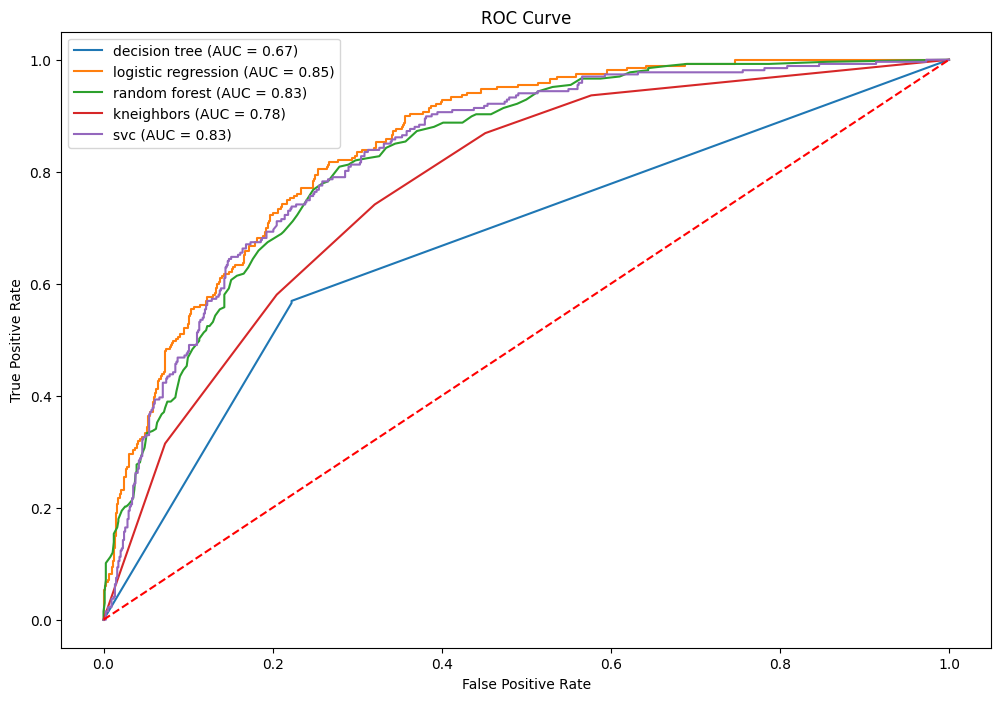

In [79]:
roc_curve_data = {}

fig,ax = plt.subplots(figsize=(12,8))

for model_name, pipeline in unbalanced_pipeline.items():
    y_score = pipeline.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_test_encoded, y_score)
    roc_auc = auc(fpr, tpr)
    roc_curve_df = pd.DataFrame({
        'false positive rate': fpr,
        'true positive rate': tpr,
        'threshold': threshold,
    })
    roc_curve_data[model_name] = roc_curve_df
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
ax.plot([0,1],[0,1],'k--',color='red')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend()
plt.show()

#### **Hyper Parameter tuning**

***Random forest***

In [80]:


param_grid = {
    'classifier__n_estimators': [2, 4, 6, 10],
    'classifier__max_depth': [1, 3, 8],
    'classifier__min_samples_split': [5, 7]
}

grid_search = GridSearchCV(
    forest,
    param_grid,
    cv = 5,
    scoring = 'f1',
    verbose = 1,
    
)
grid_search.fit(X_train, y_train_encoded)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('dpreprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler()),
                                                                                         ('power-transformation',
                                                                                          PowerTransformer())]),
                                                                         Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                                        ('cat_pipeline',
                                                                         Pipeline(steps=[('cat_impu...
      dtype='object'))])),
                                       ('Oversampler', SMOTE(random_state=42)),
                                       ('feature selection',
                                        SelectKBest(k='all',
                                                    score_func=<function mutual_info_classif at 0x0000020203AD6F80>)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [1, 3, 8],
                         'classifier__min_samples_split': [5, 7],
                         'classifier__n_estimators': [2, 4, 6, 10]},
             scoring='f1', verbose=1)

***Logistic regression model***

In [81]:
param_grid1 = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

grid_search1 = GridSearchCV(
    logistic,
    param_grid1,
    cv = 5,
    scoring = 'f1',
    verbose = 1,
)

grid_search1.fit(X_train, y_train_encoded)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('dpreprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler()),
                                                                                         ('power-transformation',
                                                                                          PowerTransformer())]),
                                                                         Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                                        ('cat_pipeline',
                                                                         Pipeline(steps=[('cat_impu...
      dtype='object'))])),
                                       ('Oversampler', SMOTE(random_state=42)),
                                       ('feature selection',
                                        SelectKBest(k='all',
                                                    score_func=<function mutual_info_classif at 0x0000020203AD6F80>)),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             scoring='f1', verbose=1)

***SVC Model***

In [82]:
param_grid2 = {
    'classifier__C': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

grid_search2 = GridSearchCV(
    svc,
    param_grid2,
    cv = 2,
    scoring = 'recall',
    verbose = 1,
)

grid_search2.fit(X_train, y_train_encoded)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('dpreprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler()),
                                                                                         ('power-transformation',
                                                                                          PowerTransformer())]),
                                                                         Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                                        ('cat_pipeline',
                                                                         Pipeline(steps=[('cat_impu...
                                       ('Oversampler', SMOTE(random_state=42)),
                                       ('feature selection',
                                        SelectKBest(k='all',
                                                    score_func=<function mutual_info_classif at 0x0000020203AD6F80>)),
                                       ('classifier',
                                        SVC(probability=True,
                                            random_state=42))]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1],
                         'classifier__gamma': ['scale', 'auto'],
                         'classifier__kernel': ['linear', 'rbf', 'poly']},
             scoring='recall', verbose=1)

**Checking for the best parameters**

***Random Forest***

In [83]:
best_parameters = grid_search.best_params_
best_parameters

{'classifier__max_depth': 8,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 10}

***Logistic Regression***

In [84]:
best_parameters1 = grid_search1.best_params_
best_parameters1

{'classifier__C': 1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

***SVC Model***

In [85]:
best_parameters2 = grid_search2.best_params_
best_parameters2

{'classifier__C': 0.001,
 'classifier__gamma': 'auto',
 'classifier__kernel': 'rbf'}

#### **Trained Models**

***Random Forest***

In [86]:
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('dpreprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler()),
                                                                  ('power-transformation',
                                                                   PowerTransformer())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy=...
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('Oversampler', SMOTE(random_state=42)),
                ('feature selection',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x0000020203AD6F80>)),
                ('classifier',
                 RandomForestClassifier(max_depth=8, min_samples_split=5,
                                        n_estimators=10, random_state=42))])

***Logistic Model***

In [87]:
best_model1 = grid_search1.best_estimator_
best_model1

Pipeline(steps=[('dpreprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler()),
                                                                  ('power-transformation',
                                                                   PowerTransformer())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy=...
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('Oversampler', SMOTE(random_state=42)),
                ('feature selection',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x0000020203AD6F80>)),
                ('classifier',
                 LogisticRegression(C=1, penalty='l1', random_state=42,
                                    solver='liblinear'))])

***SVC Model***

In [88]:
best_model2 = grid_search2.best_estimator_
best_model2

Pipeline(steps=[('dpreprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler()),
                                                                  ('power-transformation',
                                                                   PowerTransformer())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy=...
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('Oversampler', SMOTE(random_state=42)),
                ('feature selection',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x0000020203AD6F80>)),
                ('classifier',
                 SVC(C=0.001, gamma='auto', probability=True,
                     random_state=42))])

### **Predicting on the test data**

**Load the test data**

In [89]:
test_data= pd.read_csv('../data/Telco-churn-last-2000.csv')
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


**Cleaning the test data**

In [90]:
test_data['TotalCharges'] = test_data['TotalCharges'].replace(' ', np.nan)
test_data['TotalCharges'] = pd.to_numeric(test_data['TotalCharges'], errors= 'coerce')
test_data['SeniorCitizen'] =test_data['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})
test_data['MultipleLines'] =test_data['MultipleLines'].replace({'No phone service': 'No'})
test_data['OnlineSecurity'] = test_data['OnlineSecurity'].replace({'No internet service': 'No'})
test_data['OnlineBackup'] = test_data['OnlineBackup'].replace({'No internet service': 'No'})
test_data['DeviceProtection'] = test_data['DeviceProtection'].replace({'No internet service': 'No'})
test_data['TechSupport'] =test_data['TechSupport'].replace({'No internet service': 'No'})
test_data['StreamingTV'] =test_data['StreamingTV'].replace({'No internet service': 'No'})
test_data['StreamingMovies'] = test_data['StreamingMovies'].replace({'No internet service': 'No'})


**Predictions with the Model**

***Random Forest***

In [91]:
predictions = best_model.predict(test_data)
predictions

array([1, 0, 0, ..., 1, 0, 0])

In [92]:
dec_predictions = l_encoder.inverse_transform(predictions)
dec_predictions

array(['Yes', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

***Logistic Model***

In [93]:
predictions1 = best_model1.predict(test_data)
predictions1
                            

array([1, 0, 0, ..., 1, 0, 0])

In [94]:
dec_predictions1 = l_encoder.inverse_transform(predictions1)
dec_predictions1

array(['Yes', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

***SVC Model***

In [95]:
predictions2 = best_model2.predict(test_data)
predictions2

array([1, 1, 0, ..., 1, 0, 0])

In [96]:
dec_predictions2 = l_encoder.inverse_transform(predictions2)
dec_predictions2

array(['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [97]:
test_data['Predictions'] = predictions
test_data['DecodedPredictions'] = dec_predictions

test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Predictions,DecodedPredictions
0,7613-LLQFO,Male,No,No,No,12,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,1,Yes
1,4568-TTZRT,Male,No,No,No,9,Yes,No,No,No,...,No,No,No,Month-to-month,No,Mailed check,20.40,181.80,0,No
2,9513-DXHDA,Male,No,No,No,27,Yes,No,DSL,Yes,...,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,0,No
3,2640-PMGFL,Male,No,No,Yes,27,Yes,Yes,Fiber optic,No,...,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,0,No
4,3801-HMYNL,Male,No,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,1,Yes


In [98]:
test_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Predictions,DecodedPredictions
1995,7912-SYRQT,Female,No,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95,1,Yes
1996,3557-HTYWR,Female,No,No,No,47,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.30,0,No
1997,4816-JBHOV,Male,Yes,No,No,2,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.70,1,Yes
1998,8920-NAVAY,Male,Yes,No,No,62,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35,0,No
1999,1699-TLDLZ,Female,No,Yes,Yes,16,Yes,No,No,No,...,No,No,No,Two year,No,Mailed check,19.70,301.55,0,No


The random forest model is the prefered choice for making predictions. The predictions and its decoded predictions columns are added to the original test data.

In [99]:
test_data.to_csv('New_Test_data.csv',index=False)

In [111]:
import joblib


In [117]:
filepath1= 'C:/Users/USER/OneDrive/Documents/LP 2_Classification\Telco-customer-churn-analysis\models\Random_forest'

In [118]:
joblib.dump(best_model,filepath1)

['C:/Users/USER/OneDrive/Documents/LP 2_Classification\\Telco-customer-churn-analysis\\models\\Random_forest']

In [119]:
filepath2= 'C:/Users/USER/OneDrive/Documents/LP 2_Classification\Telco-customer-churn-analysis\models\Logistic_model'

In [120]:
joblib.dump(best_model1,filepath2)

['C:/Users/USER/OneDrive/Documents/LP 2_Classification\\Telco-customer-churn-analysis\\models\\Logistic_model']

In [121]:
filepath3= 'C:/Users/USER/OneDrive/Documents/LP 2_Classification\Telco-customer-churn-analysis\models\SVC_model'

In [122]:
joblib.dump(best_model2,filepath3)

['C:/Users/USER/OneDrive/Documents/LP 2_Classification\\Telco-customer-churn-analysis\\models\\SVC_model']